# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

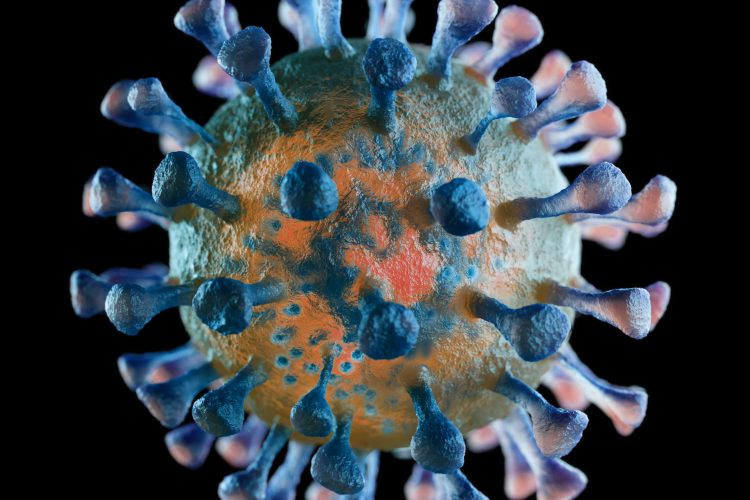

# Introduction

Is there any relationship between the spread of the Coronavirus and how happy the people who are living in that country?

Datasets being used in the search of this question are World Happiness Index by United Nations and Covid-19 Daily Dataset by John Hopkins University. Two of them are available on their websites.

### Let's Import the modules 

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image

### Importing covid19 dataset


In [ ]:
corona_dataset_csv = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
corona_dataset_csv.head(10)

### Delete the useless columns (locations)

In [ ]:
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)

In [ ]:
corona_dataset_csv.head(10)

### Aggregating the rows by the country

In [ ]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [ ]:
corona_dataset_aggregated.head()

### Visualizing data related to a country 

In [ ]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Turkey'].plot()
plt.legend()

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

### Total Number in China

In [ ]:
corona_dataset_aggregated.loc['China'].plot()

### Number of infections in 3 days

In [ ]:
corona_dataset_aggregated.loc['China'][:3].plot()

#### Defination: The intensity of the virus can be described by the maximum number of new confirmed cases over 24 hours.

# Calculating the first derivative of the curve

In [ ]:
names = ["China", "Italy", "Turkey"]
for name in names:
    data_= corona_dataset_aggregated.loc[name].values
    data__ = corona_dataset_aggregated.loc[name].keys()
    data_diff = []
    for i in range(len(data_)-1):
         data_diff.append(abs(data_[i+1]-data_[i]))
        
    d = dict( Daily_Increase = data_diff, Numbers = data__ )

    df= pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
    df.plot(title=name)


#### Infection rate of the virus is very high in particular days!

### Find maxmimum infection rate for China, Italy and Turkey

In [ ]:
corona_dataset_aggregated.loc['China'].diff().max()

In [ ]:
corona_dataset_aggregated.loc['Italy'].diff().max()

In [ ]:
corona_dataset_aggregated.loc['Turkey'].diff().max()

##### For some countries, Coronavirus can copy itself faster than the others.

### Find maximum infection rate for all of the countries. 

In [ ]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated['max infection rate'] = max_infection_rates

In [ ]:
corona_dataset_aggregated.head()

### Create a new dataframe with only Max Infection Rate 

In [ ]:
corona_data = pd.DataFrame(corona_dataset_aggregated['max infection rate'])

In [ ]:
corona_data.head(-10)
#We will use this new dataframe soon.

## Time to Relate all to Hapiness
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Importing the dataset

In [ ]:
world_happiness_report = pd.read_csv("../input/world-happiness/2019.csv")
world_happiness_report.head()

### Let's drop the useless columns 

In [ ]:
columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
world_happiness_report.drop(columns_to_dropped,axis=1 , inplace=True)

In [ ]:
world_happiness_report.head()

### Changing the indices of the dataframe

In [ ]:
world_happiness_report.set_index(['Country or region'],inplace=True)
world_happiness_report.head()

### Now let's join two dataset we have prepared  

#### Corona Dataset :

In [ ]:
#Time to use our infection rates DataFrame
corona_data.head()

#### World Happiness Report Dataset :

In [ ]:
world_happiness_report.head()

In [ ]:
data = world_happiness_report.join(corona_data).copy()

### Visualization of the results

In [ ]:
data.head()

## Correlation between GDP per Capita and Maximum Infection Rate 

r = Σᵢ((xᵢ − mean(x))(yᵢ − mean(y))) (√Σᵢ(xᵢ − mean(x))² √Σᵢ(yᵢ − mean(y))²)⁻¹

A smaller absolute value of r indicates weaker correlation. Correlation Coefficient for GDP per capita and max infection rate is greater than 0	positive but not so much. Therefore, there is a weak positive correlation between these two.

In [ ]:
X = data['GDP per capita']
Y = data['max infection rate']

X_bar = np.mean(X) #finding the average for all X values
Y_bar = np.mean(Y) #finding the average for all Y values

top = np.sum((X - X_bar) * (Y - Y_bar))

bot = np.sqrt(np.sum(np.power(X - X_bar, 2)) * np.sum(np.power(Y - Y_bar, 2)))

print("Correlation of GDP per Capita and Max Infection Rate:", top/bot)



In [ ]:
X = data['Freedom to make life choices']
Y = data['max infection rate']

X_bar = np.mean(X) #finding the average for all X values
Y_bar = np.mean(Y) #finding the average for all Y values

top = np.sum((X - X_bar) * (Y - Y_bar))

bot = np.sqrt(np.sum(np.power(X - X_bar, 2)) * np.sum(np.power(Y - Y_bar, 2)))

print("Correlation of Freedom to make life choices and Max Infection Rate:", top/bot)

In [ ]:
data.corr()

# Regression Analysis using Least Square Method

In [ ]:
Image(filename='../input/images/img/LSM.png') 

The “square” here refers to squaring the distance between a data point and the regression line. The line with the minimum value of the sum of square is the best-fit regression line. 
Regression Line, y = mx+c where,

y = Dependent Variable

x= Independent Variable 

### Plotting GDP vs maximum Infection rate

In [ ]:
X = data['GDP per capita']
Y = data['max infection rate']

# Mean X and Y
x_bar = np.mean(X)
y_bar = np.mean(Y)

top = np.sum((X - x_bar) * (Y - y_bar))
bot = np.sum(np.power(X - x_bar, 2)) 

m = top / bot
c = y_bar - (m * x_bar)
 
# Print coefficients
print(m, c)

In [ ]:
# Plotting Values and Regression Line
max_x = np.max(X) 
min_x = np.min(X) 
# Calculating line values x(independent values) and line(output)
independent = np.linspace(min_x, max_x,)
line = c + m * independent 

plt.plot(independent, line, color='#52b920', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X, Y, c='#ef4423', label='Countries')
 
plt.xlabel('GDP per Capita')
plt.ylabel('Max Infection Rate')
plt.legend()
plt.show()

# Root Mean Square Error (Root Mean Square Deviation)

In [ ]:
Image(filename='../input/images/img/RMSD.png') 

In [ ]:
pred = []
for i in X.values:
    pred.append(i * m + c)
numer = np.sum(np.power(pred -Y , 2))
denom = len(pred)

RMSD = np.sqrt(numer/denom)
print("\n","root-mean-square-error(RMSE):",RMSD,"\n")

## Comparing Infection with Other Parameters

Note: We will use log(y) instead of just y when plotting the line for the sake of visualization from now on!

In [ ]:
x = data['GDP per capita']
y = data['max infection rate']
sns.regplot(x,np.log(y))

### Plotting Social support vs maximum Infection rate

In [ ]:
x = data['Social support']
y = data['max infection rate']
sns.regplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

In [ ]:
x = data['Healthy life expectancy']
y = data['max infection rate']
sns.regplot(x,np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

In [ ]:
x = data['Freedom to make life choices']
y = data['max infection rate']
sns.regplot(x,np.log(y))


# First Results and Beyond

Those results show us that people who live in the more developed countries are more prone to get infection of coronavirus with compare to less developed countries. You may say that this because of lack of corona test kits in less developed countries. So we can do the same operations for aggregated death numbers. Let's check total death numbers to find out the result.

## Visualizing Death Numbers

In [ ]:
corona_dataset_csv2 = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
corona_dataset_csv2.drop(['Lat','Long'],axis=1,inplace=True)
corona_dataset_aggregated2 = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated2.loc['China'].plot()
corona_dataset_aggregated2.loc['Italy'].plot()
corona_dataset_aggregated2.loc['Turkey'].plot()
plt.legend() 

## Finding maximum death rate for every country

In [ ]:
countries2 = list(corona_dataset_aggregated.index)
max_death_rates = []
for country in countries2 :
    max_death_rates.append(corona_dataset_aggregated2.loc[country].diff().max())
corona_dataset_aggregated2['Max Death Rate'] = max_death_rates

In [ ]:
corona_data2 = pd.DataFrame(corona_dataset_aggregated2['Max Death Rate'])

In [ ]:
corona_data2.head()

In [ ]:
data2 = world_happiness_report.join(corona_data2).copy()
data2.head()

# Correlation matrix

In [ ]:
data2.corr()

### Plotting GDP vs maximum death rate

In [ ]:
x = data2['GDP per capita']
y = data2['Max Death Rate']
sns.regplot(x,np.log(y))

### Plotting Social support vs maximum death rate

In [ ]:
x = data2['Social support']
y = data2['Max Death Rate']
sns.regplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate


In [ ]:
x3 = data2['Healthy life expectancy']
y3 = data2['Max Death Rate']
sns.regplot(x,np.log(y))

### Freedom to make life choices vs maximum death rate 

In [ ]:
x = data2['Freedom to make life choices']
y = data2['Max Death Rate']
sns.regplot(x,np.log(y))

# Summary

We have examined the relationship between coronavirus's spreading and a country's development. On this purpose, we used GDP and Freedom to make life choices of a country as main indicatiors of development. As a result, having an developed country may not help stopping the spread of the coronavirus. Even though there are multiple reasons that can affect behind this pandemic, it is highly likely for an undeveloped less-democratic regime to stop it by strict rules without waiting democracy to step in is easier than the happier countries. For example, USA has many states and many rules for every state. On the other hand, Chine is rules by a totalitarian government who locked people's door without even asking. Without further speaculation, We can clearly say that There was no interesting relationship between the happiness and the spread of Coronavirus in this data analysis.

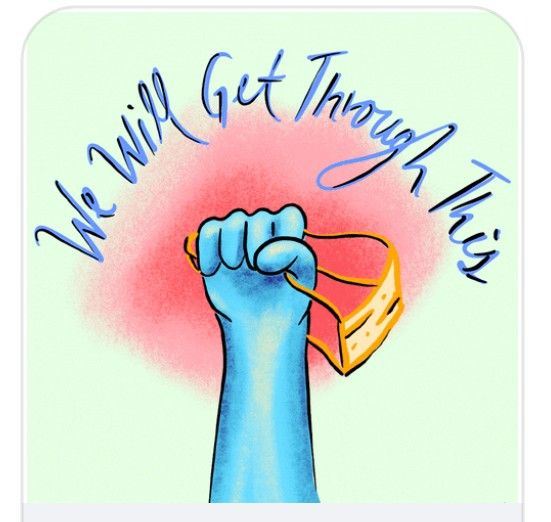